## 使用DataFrame繪製統計圖

雖然用統計量去描述資料是一件非常方便的事情，但由於數字非常抽象，有時卻又會很難了解資料比較詳細的狀況。還有沒有甚麼辦法可以讓我們瞭解資料呢? 這時候資料的視覺化就派上用場了，在後面一個單元我們將會教大家如何使用另外一個matplotlib套件對圖形做更細部的調整，然而在此我們先來看看Pandas套件內所提供的繪圖函數吧。

- ### 連續變項的統計圖

在觀察單一連續變項的資料上，我們常使用直方圖、機率密度函數圖、以及盒型圖做繪製，以下我們分別呈現如何使用pandas繪製這三種統計圖。

#### 直方圖

直方圖會把資料依據數值大小分成幾個組別，再將各組的資料筆數繪製成圖，這也是大家日常生活中最常見的統計圖之一。

In [4]:
import pandas as pd
import numpy as np

%matplotlib inline

# 載入範例的資料集，這次我們使用的是鐵達尼號的資料，後續在機器學習領域上會很常見到這份資料集
df = pd.read_csv('../common/dataset/titanc_train.csv')

<AxesSubplot:>

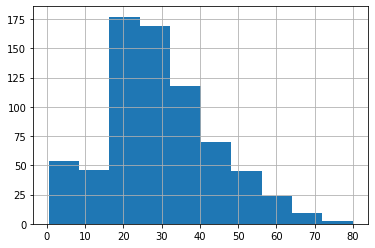

In [5]:
# 以直方圖繪製資料中年齡的分布
df['Age'].hist()

#### 機率密度函數圖

有別於將資料做離散化的分組，機率密度函數圖假設資料在各個數值上的出現機率是連續的，並且嘗試透過手上的資料估計最可能的出現機率密度為何，因此在縱軸上將會從出現的頻率改為機率密度的數值。然而在使用情境上大致與直方圖相同，都是描述資料的分布狀況。

<AxesSubplot:ylabel='Density'>

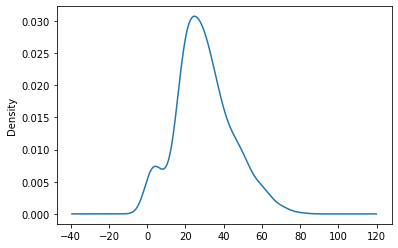

In [6]:
# 以機率密度函數圖繪製資料中年齡的分布
df['Age'].plot.kde()

#### 盒型圖

又被稱為箱型圖，圖中的幾個端點都具有統計意義，因此除了資料分佈之外也可以快速得到幾個關鍵的統計量與資料中的極端值。也因為箱型圖在視覺上非常簡潔，在做多個欄位的分布比較時很被用到。

<AxesSubplot:>

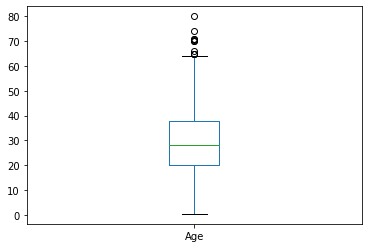

In [7]:
# 將資料中年齡的分布以盒型圖繪製
df['Age'].plot.box()

- ### 類別變項的統計圖

由於類別變項無法用連續的數值表示，上述所提到的三個圖形都不適合做類別變項的探索。若要了解類別變項的資料分布狀況，我們會使用長條圖或是圓餅圖做視覺上的呈現。

#### 長條圖

長條圖與直方圖長相類似，因此很容易被搞錯。兩者差異在於直方圖呈現的是連續型的資料，因此圖形會相互連接；而長條圖呈現的是類別型的資料，因此類別與類別之間將會有間隔。

<AxesSubplot:>

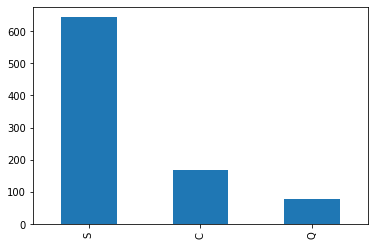

In [8]:
# 繪製上船港口(Embarked)的長條圖
# 首先需要計算每個類別的出現次數
embarked_counts = df['Embarked'].value_counts()

# 再將出現次數繪製長條圖
embarked_counts.plot.bar()

#### 圓餅圖

相較於呈現出現次數，圓餅圖呈現的是各類別的相對比例，由於它在視覺上相對美觀因此常被使用，然而圓餅圖有許多缺點，例如類別之間微小的比例差異難以直接從圖形呈現、或是不適合用於呈現多個類別的比例狀況，因此在使用上必須小心謹慎。

<AxesSubplot:ylabel='Embarked'>

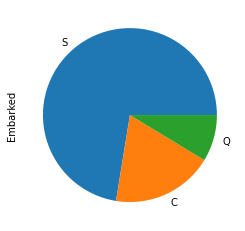

In [9]:
# 繪製上船港口(Embarked)的圓餅圖
# 首先需要計算每個類別的出現次數
embarked_counts = df['Embarked'].value_counts()

# 再將出現次數繪製圓餅圖
embarked_counts.plot.pie()

- ### 觀察欄位之間的關聯

除了了解單一變項的資料分布狀況外，我們也會觀察不同欄位之間的關係，同樣地，圖形的選擇也會依照欄位的性質而有所不同，在此我們針對散佈圖與群組盒型圖兩種圖表作介紹。

#### 散佈圖

散佈圖適合的欄位類型為兩個連續的變項，我們可以以直接的方式觀察兩個欄位數值之間的關聯。

<AxesSubplot:xlabel='Age', ylabel='Fare'>

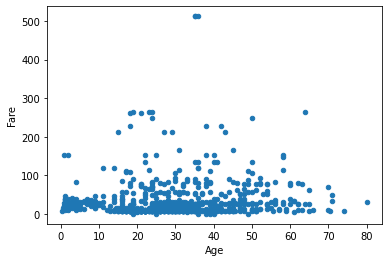

In [10]:
# 針對年齡(Age)與票價(Fare)繪製散佈圖
df.plot.scatter(x='Age', y='Fare')

#### 群組盒型圖

若兩個欄位之一為類別型的變項，我們常會以群組盒型圖作資料分布的比較。

<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

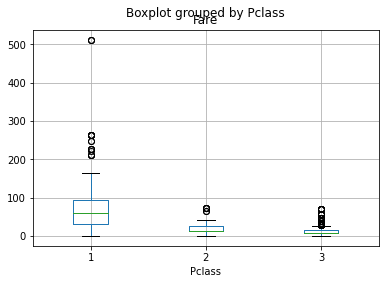

In [11]:
# 針對票價(Fare)與艙等(Pclass)繪製群組盒型圖
df.boxplot(column='Fare', by='Pclass')